In [35]:
import numpy as np                    # Imort Numpy for numerical computations
import pandas as pd                   # Import pandas for reading CSV
import matplotlib.pyplot as plt       # Import Matplotlib's pyplot for plotting
import seaborn as sns                 # Import seaborn for statistical data visualization
from scipy.stats import skew, kurtosis# Import scipy to access vide range of statistical function

In [36]:
# page source:  https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset
# read the csv file for visualization
data = pd.read_csv(r"C:\Users\lenovo\Downloads\assignment2\data.csv")
#data
# Display the first 5 rows of the dataframe

data.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [37]:
# checking for shape to understand the data set 
data.shape

(1553, 15)

In [38]:
# checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [39]:
# print the data type of manufacturing_year before conversion
print(data['manufacturing_year'].dtype)

object


In [40]:
# converting the manufacturing year to numeric
data['manufacturing_year'] = pd.to_numeric(data['manufacturing_year'], errors='coerce')

In [41]:
# Check the data types after conversion
print(data['manufacturing_year'].dtype)

float64


In [42]:
# Checking statistics of columns for the float64 data type
data.describe(include=['float64'])

,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1503.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,2017.371257,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,3.008293,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,2007.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,2015.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,2018.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,2019.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,2023.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [43]:
# Checking statistics of columns for the int64 data type
data.describe(include=['int64'])

,Unnamed: 0,seats,kms_driven
count,1553.000000,1553.000000,1553.000000
mean,776.000000,91.480361,52841.931101
std,448.456798,2403.424060,40067.800347
min,0.000000,4.000000,620.000000
25%,388.000000,5.000000,30000.000000
50%,776.000000,5.000000,49134.000000
75%,1164.000000,5.000000,70000.000000
max,1552.000000,67000.000000,810000.000000


In [44]:
# Checking the unique values of the dataframe
data.nunique()

Unnamed: 0            1553
car_name               925
registration_year      178
insurance_validity       6
fuel_type                4
seats                    6
kms_driven             710
ownsership              22
transmission            13
manufacturing_year      16
mileage(kmpl)          332
engine(cc)             147
max_power(bhp)         147
torque(Nm)             281
price(in lakhs)        630
dtype: int64

In [45]:
# Checking the unique values of the insurance_validity in dataframe
data.insurance_validity.unique()

array(['Comprehensive', 'Third Party insurance', 'Zero Dep',
       'Third Party', 'Petrol', 'Not Available'], dtype=object)

In [46]:
# Converting values of Not Applicable to NA
data['insurance_validity'] = data['insurance_validity'].replace('Not Available' , pd.NA)

In [47]:
# Checking the update in unique values of the insurance_validity in dataframe
data.insurance_validity.unique()

array(['Comprehensive', 'Third Party insurance', 'Zero Dep',
       'Third Party', 'Petrol', <NA>], dtype=object)

In [48]:
# Checking the  unique values of the ownsership in dataframe
data.ownsership.unique()

array(['First Owner', 'Second Owner', 'Third Owner', '2993 cc', '1461 cc',
       '998 cc', '1995 cc', '1451 cc', '1998 cc', '1498 cc', '1497 cc',
       '1996 cc', '1950 cc', '2013', 'Fifth Owner', '1199 cc', '1248 cc',
       '999 cc', '1197 cc', '1984 cc', '2999 cc', '1968 cc'], dtype=object)

In [49]:
# Checking the  unique values of the transmission in dataframe
data.transmission.unique()

array(['Automatic', 'Manual', '2017', '2014', '2023', '2020', '2021',
       '2011', '2022', 'Power Windows Front', '2018', '2015', '2016'],
      dtype=object)

In [50]:
# Checking the unique values of fuel_type in dataframe
data.fuel_type.unique()

array(['Petrol', 'Diesel', 'CNG', '5 Seats'], dtype=object)

In [51]:
# Checking the unique values of the seats in dataframe
data.seats.unique()

array([    5,     6,     7,     4,     8, 67000], dtype=int64)

In [52]:
# Checking the duplicate values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1548    False
1549    False
1550    False
1551    False
1552    False
Length: 1553, dtype: bool

In [53]:
# checking for the sum of the null values in each column
print(data.isnull().sum())

Unnamed: 0             0
car_name               0
registration_year      0
insurance_validity     2
fuel_type              0
seats                  0
kms_driven             0
ownsership             0
transmission           0
manufacturing_year    50
mileage(kmpl)          3
engine(cc)             3
max_power(bhp)         3
torque(Nm)             4
price(in lakhs)        0
dtype: int64


In [54]:
# Dropping the missing values 
data.dropna( subset=['mileage(kmpl)', 'engine(cc)','max_power(bhp)','torque(Nm)','insurance_validity','manufacturing_year'], inplace=True)


In [55]:
# checking for the sum of the null values in each column after droping all null values
print(data.isnull().sum())

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64


In [56]:
data.corr(numeric_only=True)

,Unnamed: 0,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
Unnamed: 0,1.000000,-0.059827,0.042432,-0.097108,-0.010440,0.004740,0.004740,0.045115,-0.016359
seats,-0.059827,1.000000,0.047603,0.089292,0.091711,0.193023,0.193023,-0.023585,-0.013612
kms_driven,0.042432,0.047603,1.000000,-0.385373,-0.094675,-0.042461,-0.042461,0.036398,0.003683
manufacturing_year,-0.097108,0.089292,-0.385373,1.000000,0.063866,0.099349,0.099349,-0.114320,-0.105217
mileage(kmpl),-0.010440,0.091711,-0.094675,0.063866,1.000000,0.363169,0.363169,-0.046791,0.045848
engine(cc),0.004740,0.193023,-0.042461,0.099349,0.363169,1.000000,1.000000,-0.009990,-0.003301
max_power(bhp),0.004740,0.193023,-0.042461,0.099349,0.363169,1.000000,1.000000,-0.009990,-0.003301
torque(Nm),0.045115,-0.023585,0.036398,-0.114320,-0.046791,-0.009990,-0.009990,1.000000,-0.006811
price(in lakhs),-0.016359,-0.013612,0.003683,-0.105217,0.045848,-0.003301,-0.003301,-0.006811,1.000000


In [57]:
numeric_data = data.select_dtypes(include='number')

# Calculate skewness
skewness = numeric_data.apply(skew)

# Calculate kurtosis
kurt = numeric_data.apply(kurtosis)

print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurt)


Skewness:
 Unnamed: 0            -0.030383
seats                  2.306065
kms_driven             8.745030
manufacturing_year    -0.375509
mileage(kmpl)          3.460915
engine(cc)            14.521081
max_power(bhp)        14.521081
torque(Nm)            11.995090
price(in lakhs)       23.054069
dtype: float64

Kurtosis:
 Unnamed: 0             -1.189508
seats                   4.181104
kms_driven            154.696763
manufacturing_year     -0.196873
mileage(kmpl)          12.835855
engine(cc)            208.861810
max_power(bhp)        208.861810
torque(Nm)            148.122791
price(in lakhs)       541.960530
dtype: float64


In [58]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Unnamed: 0     seats  kms_driven  manufacturing_year  \
Unnamed: 0            1.000000 -0.059827    0.042432           -0.097108   
seats                -0.059827  1.000000    0.047603            0.089292   
kms_driven            0.042432  0.047603    1.000000           -0.385373   
manufacturing_year   -0.097108  0.089292   -0.385373            1.000000   
mileage(kmpl)        -0.010440  0.091711   -0.094675            0.063866   
engine(cc)            0.004740  0.193023   -0.042461            0.099349   
max_power(bhp)        0.004740  0.193023   -0.042461            0.099349   
torque(Nm)            0.045115 -0.023585    0.036398           -0.114320   
price(in lakhs)      -0.016359 -0.013612    0.003683           -0.105217   

                    mileage(kmpl)  engine(cc)  max_power(bhp)  torque(Nm)  \
Unnamed: 0              -0.010440    0.004740        0.004740    0.045115   
seats                    0.091711    0.193023        0.193023   -

In [59]:
# Checking if data ready for analysis
data

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017.0,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020.0,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018.0,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019.0,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019.0,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1547,2022 Maruti Ertiga VXI CNG,May-22,Third Party insurance,CNG,7,26500,First Owner,Manual,2022.0,26.11,1462.0,1462.0,8663.0,11.50
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020.0,1493.00,11345.0,11345.0,250.0,17.41
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017.0,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018.0,18.78,999.0,999.0,75.0,4.75


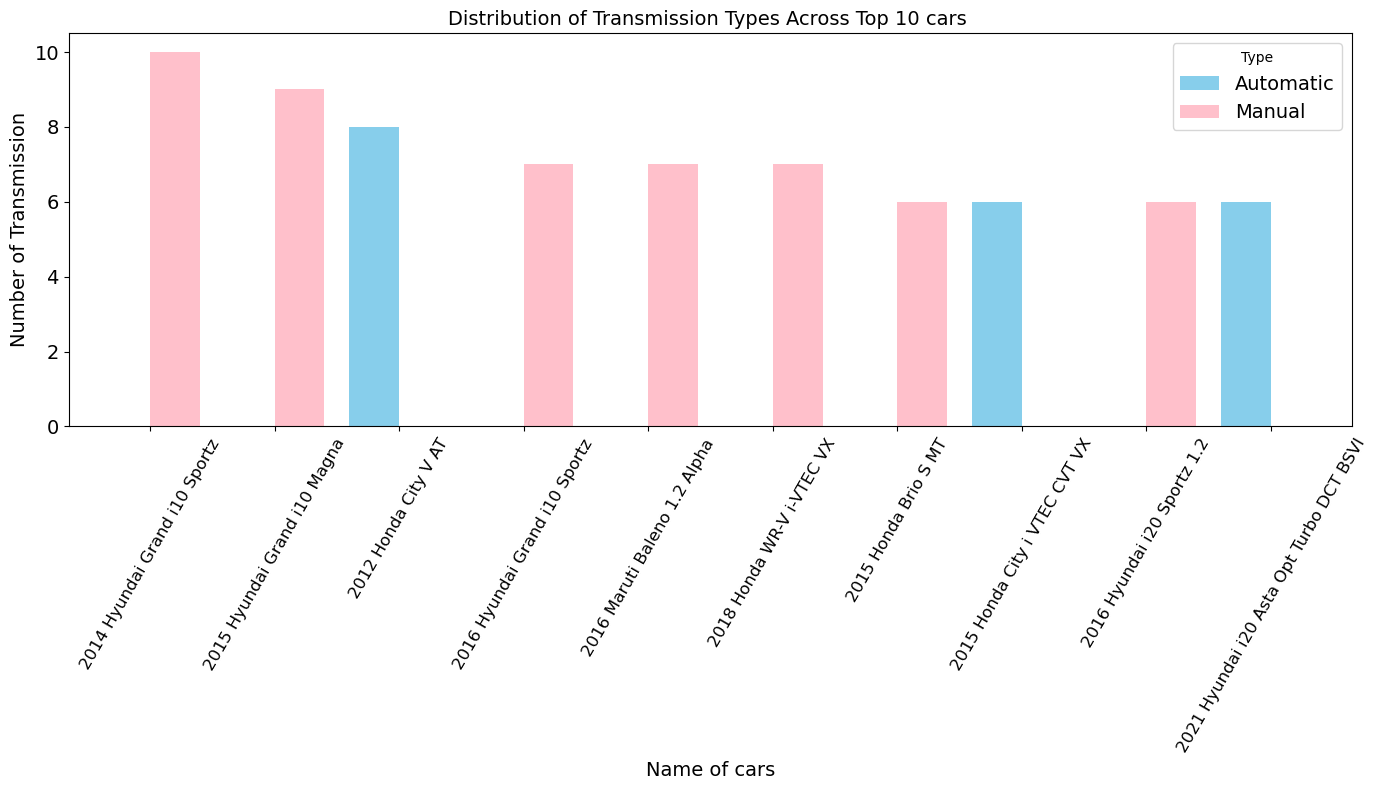

In [60]:
# BAR GRAPH - PLOT 1
def plot_grouped_content_distribution(data, top_n_cars=10):
    """
    Visualizes the distribution of Autonamic and Manual cars
    """
    
    # Splitting 'car_name' column for titles listed with multiple car_name    
    data_expanded = data.assign(cars=data['car_name'].str.split(', ')).explode('car_name')
    
    # Aggregate data to count automatic and manual transmission per car   
    cars_content = data_expanded.groupby(['car_name', 'transmission']).size().unstack().fillna(0)
   

    # Summing across rows to get total content count per car_name, and selecting top N cars 
    top_cars= cars_content.sum(axis=1).nlargest(top_n_cars).index
    cars_content_top = cars_content.loc[top_cars]
    

# Plotting
    cars_content_top.plot(kind='bar', color=['skyblue', 'pink'], figsize=(14, 8), width=0.8)
    plt.title(f'Distribution of Transmission Types Across Top {top_n_cars} cars ', fontsize=14)
    plt.xlabel('Name of cars', fontsize=14)
    plt.ylabel('Number of Transmission', fontsize=14)
    plt.xticks(rotation=60 ,fontsize=12)
    plt.yticks(fontsize=14)
    plt.legend(title='Type', fontsize=14)
    plt.tight_layout()
    plt.show()



plot_grouped_content_distribution(data, top_n_cars=10)

In [82]:
grouped_data=data.groupby("manufacturing_year")[["mileage(kmpl)","engine(cc)","torque(Nm)","price(in lakhs)"]].mean()
x_data = grouped_data.index
y_data = [grouped_data['mileage(kmpl)'], grouped_data['engine(cc)'],grouped_data['torque(Nm)'],grouped_data['price(in lakhs)']]
xlabel = 'Year of Manufacturing'
ylabel = 'Mean of all vales'
labels = ["mileage(kmpl)","engine(cc)","torque(Nm)","price(in lakhs)"]
title = "Variation of mean of various values with respect to each year "
color = ['blue', 'red',"green","orange"]

In [95]:
def multiplot(x_data, y_data, xlabel, ylabel, labels, title, color):
    """
    This creates a multiple line plot.
    """
    plt.figure(figsize=(16, 12), dpi=200)
    plt.title(title, fontsize=20)
    for i in range(len(y_data)):
        plt.plot(x_data, y_data[i], marker="3",linestyle="-.", label=labels[i], color=color[i])
        plt.yscale('log')
        plt.xlabel(xlabel, fontsize=20)
        plt.ylabel(ylabel, fontsize=20)
        plt.xticks(rotation=45, fontsize=14) # Rotate x-axis labels for better readability
        plt.yticks(fontsize=14)
        plt.legend(fontsize=14)
        plt.grid
        
    return

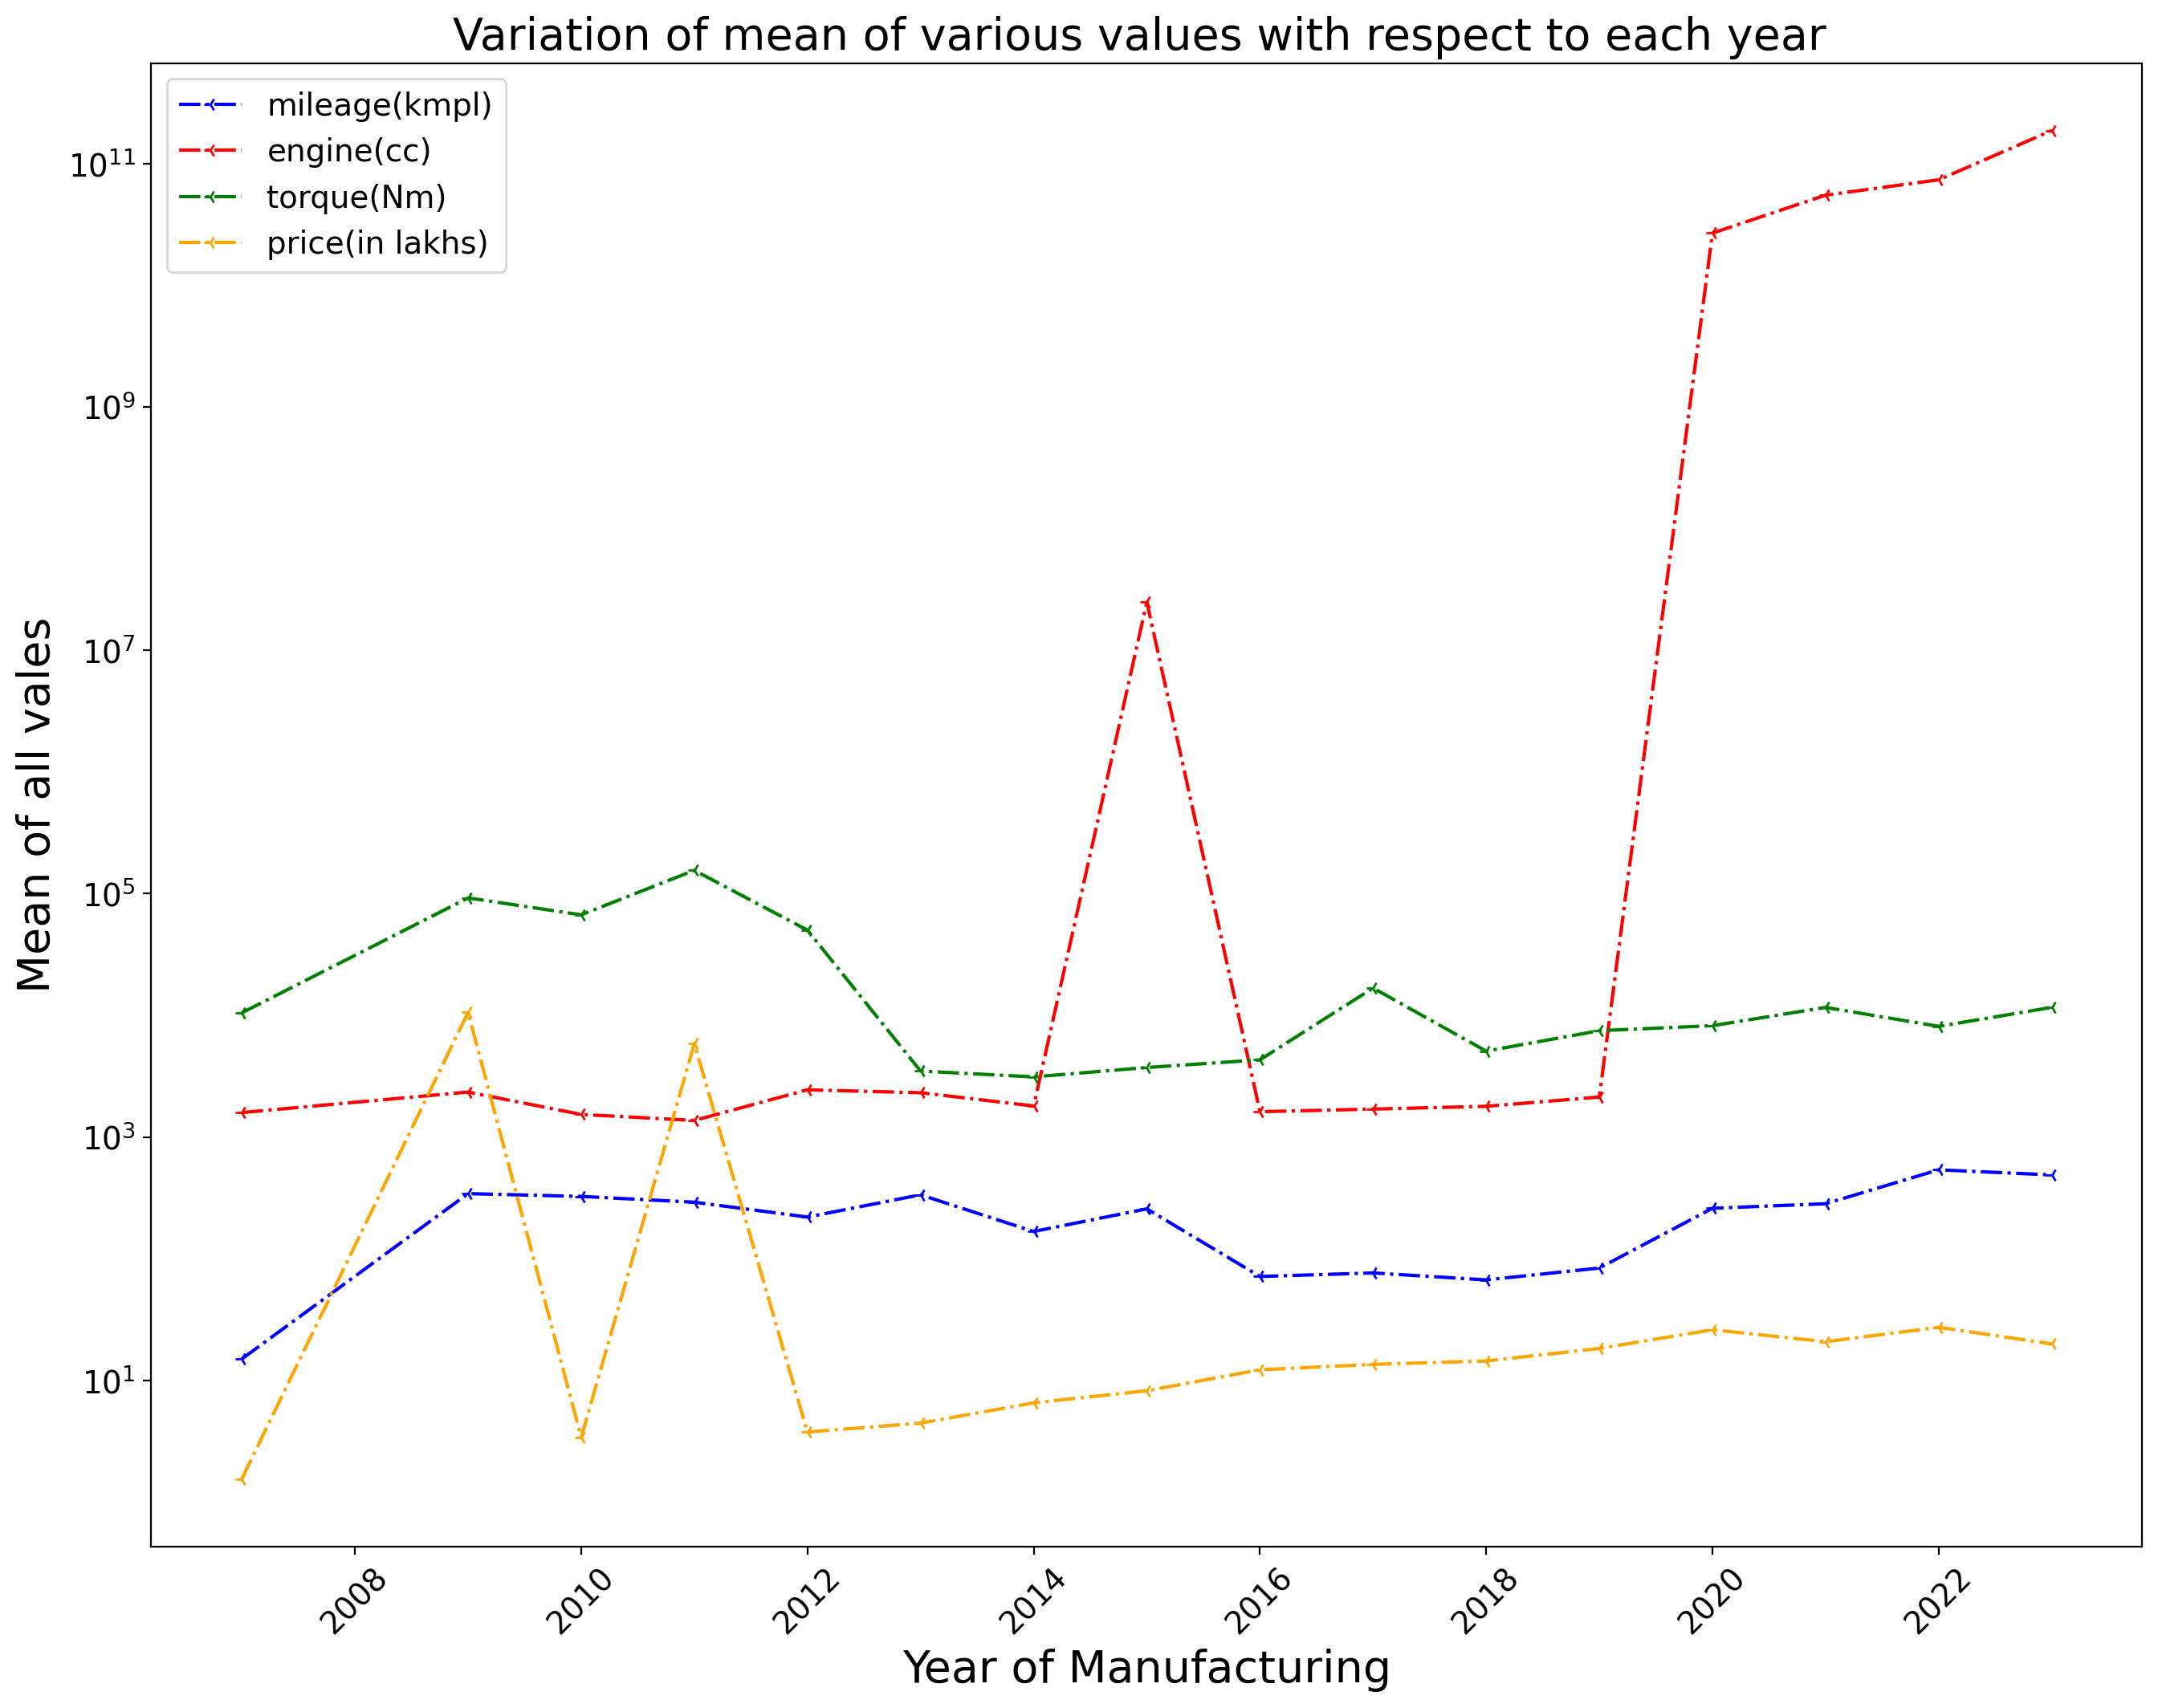

In [96]:
multiplot(x_data, y_data, xlabel, ylabel, labels, title, color)

In [64]:
# assigning values for graph 1
df_data = data
x_data = 'ownsership'
y_data = 'kms_driven'

In [65]:
def plot_boxplot(df_data,x_data,y_data):
    """
    Creates box plot to visualize the distribution of kilometers driven with different ownership
    """
    plt.figure(figsize=(10, 8))
    
    sns.boxplot(x = x_data, y = y_data, data = data, palette = "coolwarm")
    
    plt.title("Relationship between kilometers driven and ownership")
    plt.yscale('log')
    
    plt.xlabel('Ownership')
    plt.ylabel('Kilometers driven')
    
    plt.xticks(rotation=30)
    plt.show()
    
    return   

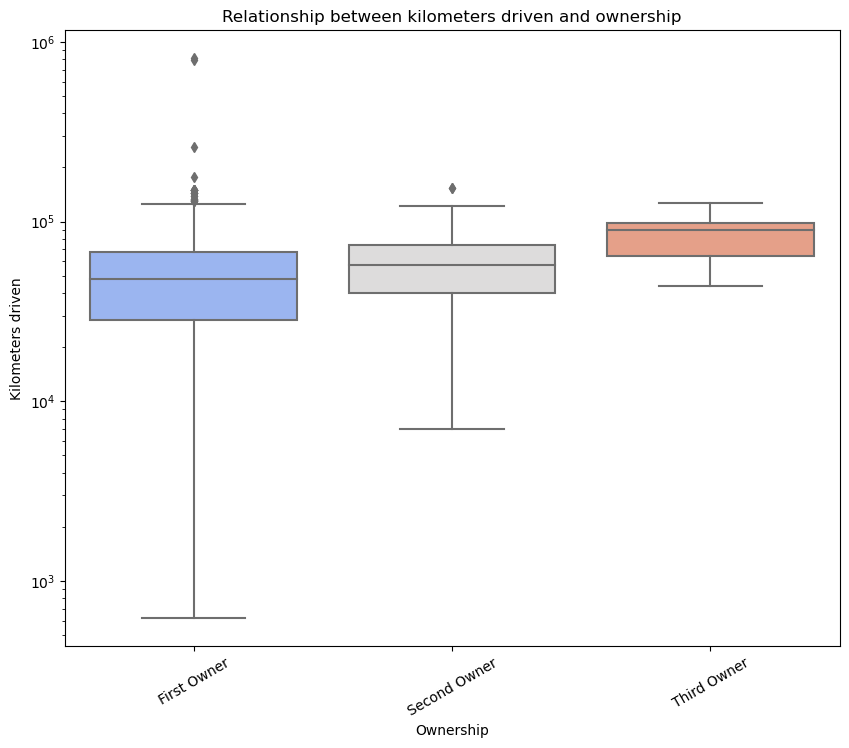

In [66]:
#defining the funtion
plot_boxplot(df_data,x_data,y_data)